# Research Question 2

Is it possible to predict the success of future instalments of a movie/game?\
Does the failure of an initial movie/game indicate commercial failures of subsequent ones? Can a franchise recover from a flop?


In [2]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plot_title_size = 30
subplot_title_size = 25
axis_label_size = 22
tick_label_size = 15

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv("final_dataframes\\df_merged_years.csv", index_col = 0)
franchise_df = pd.read_csv("final_dataframes\\df_franchise_grouped.csv", index_col = 0)

In [6]:
# create separate dataframes for movie and game content types
df_movie = df[df['type'] == 'movie']
df_game = df[df['type'] == 'game']
franchise_df_movie = franchise_df[franchise_df['content_type'] == 'movie']
franchise_df_game = franchise_df[franchise_df['content_type'] == 'game']

In [7]:
franchise_df

,franchise_name,running_length_years,releases_in_franchise,first_year,last_year,release_gap_range,content_per_year,content_type,average_rating,lowest_rating,highest_rating,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,average_votes,lowest_votes,highest_votes,lowest_rated_year,lowest_rated_pos,avg_year_diff,avg_vote_diff,avg_rating_diff,avg_num_of_releases_diff,biggest_drop,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop
franchise_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
3025-1,Mario,45,197.0,1978,2022,1.0,4.477273,game,6.757640,1.9,9.2,6.357143,7.007042,735.716252,6.0,6633.0,1994,36.363636,1.023256,1.709302,0.097674,0.023256,-1.957143,1994,36.363636,6.300222,7.086886
3025-10,Tony Hawk,22,15.0,1999,2020,4.0,1.071429,game,6.671429,2.4,8.5,6.869231,8.500000,606.607143,17.0,1517.0,2015,76.190476,1.615385,-48.384615,0.053846,0.000000,-4.469231,2015,76.190476,6.875000,8.500000
3025-100,Commander Keen,12,8.0,1990,2001,9.0,2.666667,game,6.997222,6.7,7.8,7.185714,NaN,70.305556,31.0,126.0,2001,100.000000,5.500000,-32.833333,-0.083333,-1.000000,-0.485714,2001,100.000000,7.145833,NaN
3025-1000,Fate,22,10.0,2000,2021,4.0,1.000000,game,7.480000,7.1,8.1,7.600000,7.512500,52.900000,7.0,154.0,2005,23.809524,2.333333,-3.777778,-0.055556,0.000000,-0.500000,2005,23.809524,7.600000,7.512500
3025-1008,Winx Club,9,6.0,2006,2014,3.0,1.200000,game,7.580000,7.1,8.2,7.550000,8.200000,11.700000,5.0,48.0,2012,75.000000,2.000000,-6.125000,0.150000,-0.250000,-0.450000,2012,75.000000,7.533333,8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f99,The Conjuring Universe,9,8.0,2013,2021,1.0,1.142857,movie,6.264286,5.2,7.5,6.400000,6.300000,205675.000000,52691.0,521137.0,2019,75.000000,1.333333,-66447.333333,-0.200000,0.000000,-2.100000,2014,12.500000,7.500000,6.190000
f990,Inspector Hornleigh,3,3.0,1939,1941,0.0,1.500000,movie,6.725000,6.7,6.8,NaN,6.700000,258.000000,225.0,271.0,1939,0.000000,2.000000,20.000000,-0.050000,-1.000000,-0.050000,1941,100.000000,6.750000,NaN
f993,I soliti ignoti,28,4.0,1958,1985,23.0,1.333333,movie,6.416667,4.9,7.9,7.900000,5.400000,4458.333333,180.0,10873.0,1960,7.407407,13.500000,-5346.500000,-1.250000,0.000000,-1.950000,1960,7.407407,7.900000,5.400000


The first thing we want to examine is the 

In [8]:
highest_rated = df[df['year'] == df["highest_rated_year"]]
lowest_rated = df[df['year'] == df["lowest_rated_year"]]

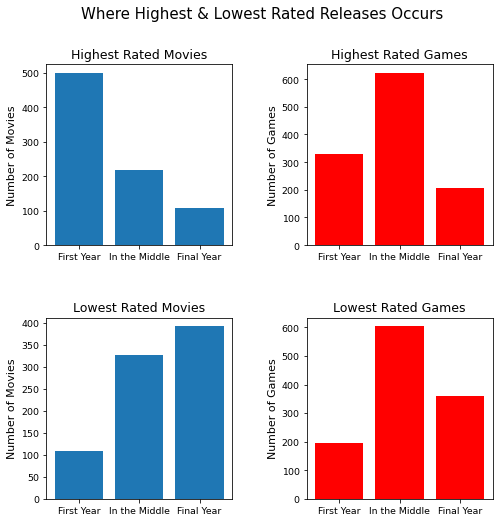

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

x_labels = ['First Year', 'In the Middle', 'Final Year']

highest_movie_values = [len(highest_rated[(highest_rated['franchise_pos'] == 0) & (highest_rated['type']=='movie')]),
            len(highest_rated[(highest_rated['franchise_pos'] > 0) & (highest_rated['franchise_pos'] < 100) & (highest_rated['type']=='movie')]),
            len(highest_rated[(highest_rated['franchise_pos'] == 100) & (highest_rated['type']=='movie')])]
                       
highest_game_values = [len(highest_rated[(highest_rated['franchise_pos'] == 0) & (highest_rated['type']=='game')]),
            len(highest_rated[(highest_rated['franchise_pos'] > 0) & (highest_rated['franchise_pos'] < 100) & (highest_rated['type']=='game')]),
            len(highest_rated[(highest_rated['franchise_pos'] == 100) & (highest_rated['type']=='game')])]

lowest_movie_values = [len(lowest_rated[(lowest_rated['franchise_pos'] == 0) & (lowest_rated['type']=='movie')]),
            len(lowest_rated[(lowest_rated['franchise_pos'] > 0) & (lowest_rated['franchise_pos'] < 100) & (lowest_rated['type']=='movie')]),
            len(lowest_rated[(lowest_rated['franchise_pos'] == 100) & (lowest_rated['type']=='movie')])]
                       
lowest_game_values = [len(lowest_rated[(lowest_rated['franchise_pos'] == 0) & (lowest_rated['type']=='game')]),
            len(lowest_rated[(lowest_rated['franchise_pos'] > 0) & (lowest_rated['franchise_pos'] < 100) & (lowest_rated['type']=='game')]),
            len(lowest_rated[(lowest_rated['franchise_pos'] == 100) & (lowest_rated['type']=='game')])]

# plot the bar chart
axs[0][0].bar(x_labels, highest_movie_values)
axs[0][1].bar(x_labels, highest_game_values, color = 'red')
axs[1][0].bar(x_labels, lowest_movie_values)
axs[1][1].bar(x_labels, lowest_game_values, color = 'red')

fig.suptitle('Where Highest & Lowest Rated Releases Occurs', fontsize = plot_title_size/2,)
axs[0][0].set_title('Highest Rated Movies', fontsize = subplot_title_size/2)
axs[0][0].set_ylabel('Number of Movies', fontsize = axis_label_size/2)
axs[0][1].set_title('Highest Rated Games', fontsize = subplot_title_size/2)
axs[0][1].set_ylabel('Number of Games', fontsize = axis_label_size/2)
axs[0][0].tick_params(labelsize=tick_label_size/1.6)
axs[0][1].tick_params(labelsize=tick_label_size/1.6)
axs[1][0].set_title('Lowest Rated Movies', fontsize = subplot_title_size/2)
axs[1][0].set_ylabel('Number of Movies', fontsize = axis_label_size/2)
axs[1][1].set_title('Lowest Rated Games', fontsize = subplot_title_size/2)
axs[1][1].set_ylabel('Number of Games', fontsize = axis_label_size/2)
axs[1][0].tick_params(labelsize=tick_label_size/1.6)
axs[1][1].tick_params(labelsize=tick_label_size/1.6)


plt.show()
fig.savefig('high_low_ratings.png', bbox_inches='tight', facecolor='w')

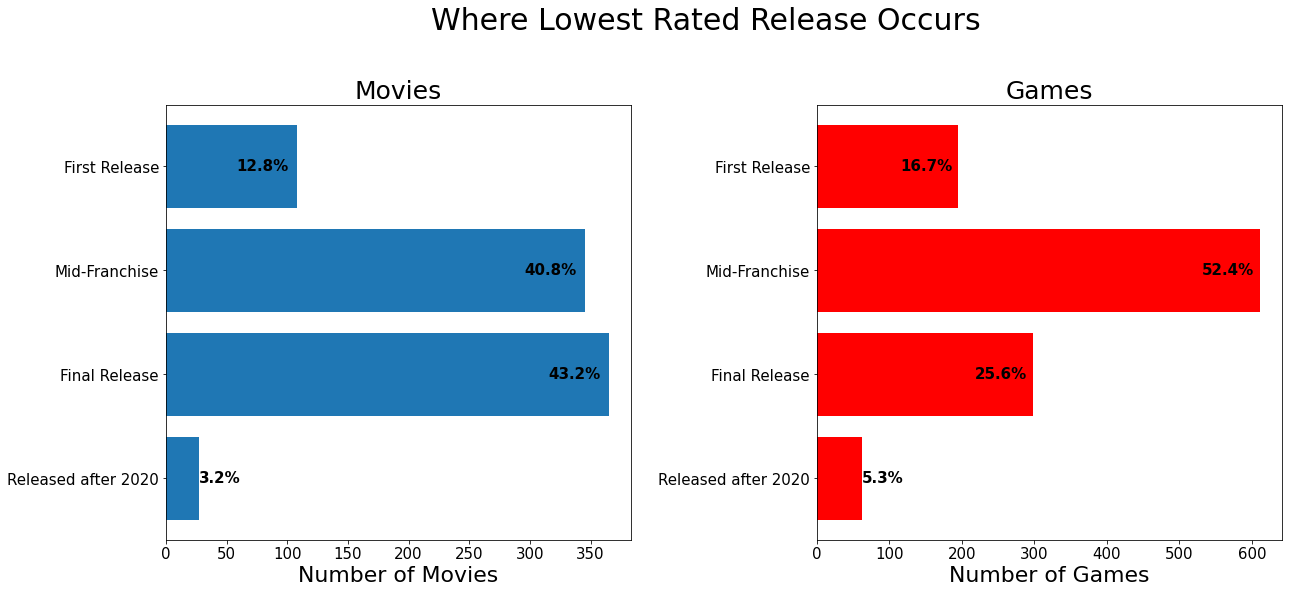

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots
fig.subplots_adjust(wspace=0.4, hspace=0.6)

# define the x-axis labels
x_labels = ['Released after 2020', 'Final Release', 'Mid-Franchise', 'First Release']

# create a list of the y-axis values
movie_values = [len(franchise_df_movie[(franchise_df_movie['lowest_rated_pos'] == 100) & (franchise_df_movie['lowest_rated_year'] >= 2020)]),
            len(franchise_df_movie[(franchise_df_movie['lowest_rated_pos'] == 100) & (franchise_df_movie['lowest_rated_year'] < 2020)]),
            len(franchise_df_movie[~(franchise_df_movie['lowest_rated_pos'] == 0) & ~(franchise_df_movie['lowest_rated_pos'] == 100)]),
            len(franchise_df_movie[franchise_df_movie['lowest_rated_pos'] == 0])]
            
game_values = [len(franchise_df_game[(franchise_df_game['lowest_rated_pos'] == 100) & (franchise_df_game['lowest_rated_year'] >= 2020)]),
            len(franchise_df_game[(franchise_df_game['lowest_rated_pos'] == 100) & (franchise_df_game['lowest_rated_year'] < 2020)]),
            len(franchise_df_game[~(franchise_df_game['lowest_rated_pos'] == 0) & ~(franchise_df_game['lowest_rated_pos'] == 100)]),
            len(franchise_df_game[franchise_df_game['lowest_rated_pos'] == 0])]
            
# plot the bar chart
axs[0].barh(x_labels, movie_values)
axs[1].barh(x_labels, game_values, color = 'red')

# set the title and y-axis label
fig.suptitle('Where Lowest Rated Release Occurs', fontsize = plot_title_size, y = 1.05)
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].set_xlabel('Number of Movies', fontsize = axis_label_size)
axs[1].set_title('Games', fontsize = subplot_title_size)
axs[1].set_xlabel('Number of Games', fontsize = axis_label_size)
axs[0].tick_params(labelsize=tick_label_size)
axs[1].tick_params(labelsize=tick_label_size)

movie_percentages = [(x / sum(movie_values)) * 100 for x in movie_values]
game_percentages = [(x / sum(game_values)) * 100 for x in game_values]

for i, v in enumerate(movie_percentages):
    if v > 10:
        axs[0].text(movie_values[i]-50, i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize=15, ha='left', va='center')
    else:
        axs[0].text(movie_values[i], i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize=15, ha='left', va='center')

for i, v in enumerate(game_percentages):
    if v > 10:
        axs[1].text(game_values[i]-80, i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize = 15, ha='left', va='center')
    else:
        axs[1].text(game_values[i], i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize = 15, ha='left', va='center')  


# display the plot
plt.show()
fig.savefig('lowest_rated.png', bbox_inches='tight', facecolor='w')

To begin to define a flop we first need to understand how our data is distributed. 

In [11]:
df_movie.sample()

,franchise_name,franchise_id,type,tconst,title,year,votes_average,rating_average,number_of_releases,content_per_year,first_year,last_year,lowest_vote,highest_vote,lowest_rating,highest_rating,franchise_pos,lowest_rated_year,lowest_rated_pos,highest_rated_year,highest_rated_pos,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,rolling_avg_rating,current_num_in_fran,year_diff,vote_diff,rating_diff,num_of_releases_diff,running_length_years,diff_from_prev_rar,change_rel_to_rar,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop
8844,Michael Shayne,f24,movie,"tt0033408, tt0035027, tt0034931, tt0035443","Blue, White and Perfect, The Man Who Wouldn't ...",1942,425.25,6.45,12.0,4,1940,1947,21.0,1142.0,4.7,6.6,28.571429,1940,0.0,1941,14.285714,NaN,6.236364,6.214286,7.0,1.0,-443.25,-0.05,2.0,8,0.314286,0.55,1946,85.714286,5.883333,6.0


In [ ]:
#DONT NEED THIS. DONE EARLIER
df_movie = df[df['type'] == 'movie']
df_game = df[df['type'] == 'game']
franchise_df_movie = franchise_df[franchise_df['content_type'] == 'movie']
franchise_df_game = franchise_df[franchise_df['content_type'] == 'game']

<AxesSubplot:xlabel='rating_average'>

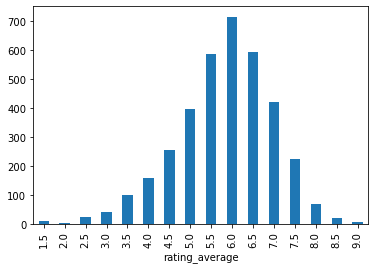

In [43]:
df_movie.groupby(df_movie["rating_average"]//0.5*0.5)['rating_average'].count().plot(kind='bar')
df_game.groupby(df_game["rating_average"]//0.5*0.5)['rating_average'].count().plot(kind='bar', color = 'blue')


In [61]:
rating_change_df = pd.DataFrame({'Movies': df_movie.diff_from_prev_rar.describe(), 'Games': df_game.diff_from_prev_rar.describe()})
rating_change_df

,Movies,Games
count,2776.000000,6193.000000
mean,-0.133368,-0.029579
std,0.325013,0.313051
min,-2.450000,-2.800000
25%,-0.250000,-0.127778
50%,-0.070000,-0.002964
75%,0.016667,0.083333
max,1.966667,2.450000


<AxesSubplot:xlabel='rating_average'>

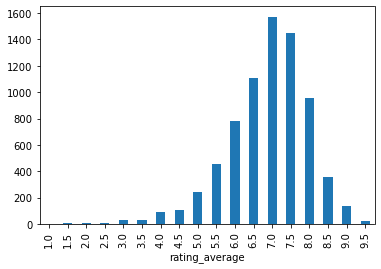

In [44]:
df_game.groupby(df_game["rating_average"]//0.5*0.5)['rating_average'].count().plot(kind='bar')


<AxesSubplot:xlabel='diff_from_prev_rar'>

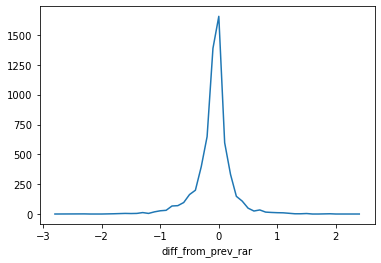

In [42]:
df_game.groupby(df_game["diff_from_prev_rar"]//0.1*0.1)['diff_from_prev_rar'].count().plot()

#df.diff_from_prev_rar.value_counts().sort_index().plot()

In [69]:
df_game['diff_from_prev_rar'].count()

6193

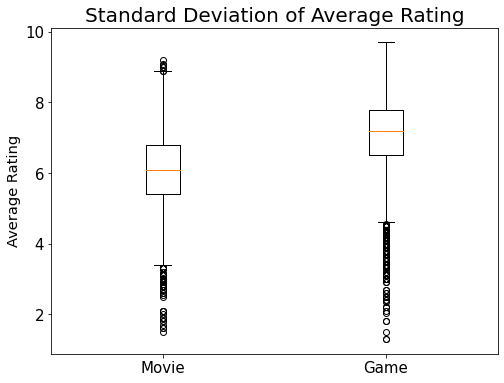

In [96]:
fig, ax = plt.subplots(figsize = (8,6))
ax.boxplot([df_movie['rating_average'].dropna(), df_game['rating_average'].dropna()])
ax.set_xticklabels(['Movie', 'Game'])
ax.tick_params(labelsize = tick_label_size)
ax.set_ylabel('Average Rating', fontsize = axis_label_size/1.5)
ax.set_title('Standard Deviation of Average Rating', fontsize = plot_title_size/1.5)
plt.show()

subplot_title_size = 25
axis_label_size = 22
tick_label_size = 15

We can tell from our standard deviation of the average rating that the game rating typically scores a lot higher than movies. We can see how this affects the rating differences across the franchises:

In [227]:
df_game_grouped

change_rel_to_rar
-6.6       1
-5.6       1
-5.2       3
-5.0       1
-4.8       3
-4.6       7
-4.4       4
-4.2       5
-4.0       5
-3.8       7
-3.6       9
-3.4      13
-3.2      18
-3.0      25
-2.8      22
-2.6      32
-2.4      38
-2.2      61
-2.0      73
-1.8      97
-1.6     164
-1.4     182
-1.2     220
-1.0     264
-0.8     351
-0.6     515
-0.4     509
-0.2     529
 0.0    1770
 0.2     574
 0.4     472
 0.6     405
 0.8     278
 1.0     208
 1.2     148
 1.4     107
 1.6      87
 1.8      39
 2.0      32
 2.2      24
 2.4      21
 2.6      12
 2.8       3
 3.0       8
 3.2       3
 3.4       2
 3.6       1
 3.8       3
 4.4       2
 4.8       1
Name: change_rel_to_rar, dtype: int64

In [226]:
df_movie_grouped

change_rel_to_rar
-5.0       1
-4.6       1
-4.4       1
-4.2       4
-4.0       1
-3.8       1
-3.6       3
-3.4       5
-3.2       3
-3.0      12
-2.8      14
-2.6      16
-2.4      19
-2.2      23
-2.0      48
-1.8      61
-1.6      84
-1.4     107
-1.2     129
-1.0     196
-0.8     229
-0.6     289
-0.4     347
-0.2     310
 0.0    1148
 0.2     192
 0.4     126
 0.6      76
 0.8      55
 1.0      38
 1.2      34
 1.4      12
 1.6       9
 1.8       8
 2.0       5
 2.2       6
 2.4       2
 2.6       2
 2.8       2
 3.2       1
 4.6       1
Name: change_rel_to_rar, dtype: int64

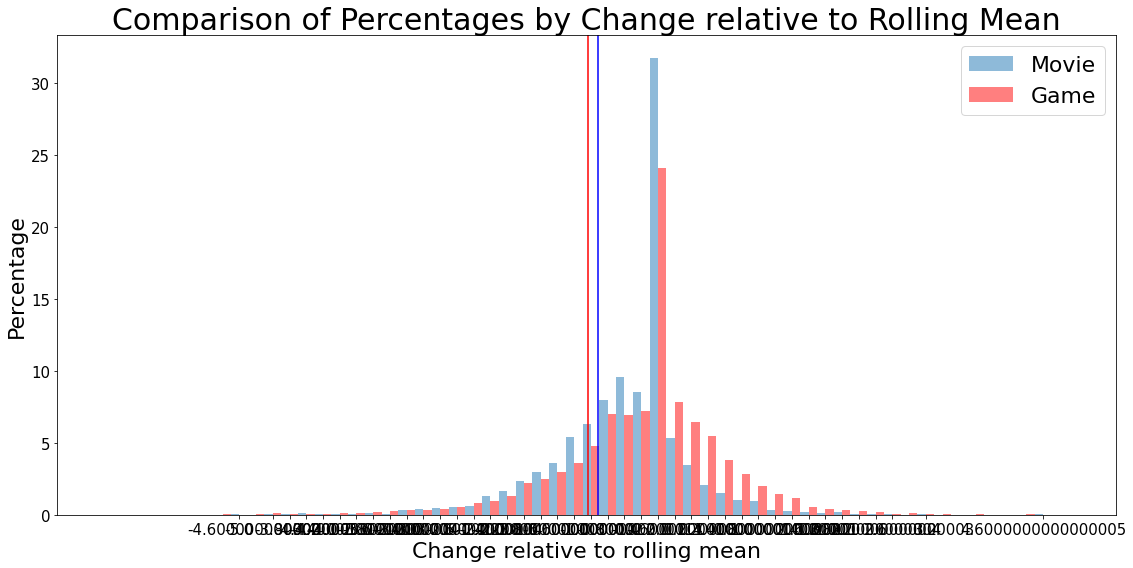

In [225]:
import matplotlib.pyplot as plt

# Group and count for df_movie
df_movie_grouped = df_movie.groupby(df_movie["change_rel_to_rar"] // 0.2 * 0.2)['change_rel_to_rar'].count()

# Group and count for df_game
df_game_grouped = df_game.groupby(df_game["change_rel_to_rar"] // 0.2 * 0.2)['change_rel_to_rar'].count()

# Calculate total counts for each group
total_movie_count = df_movie_grouped.sum()
total_game_count = df_game_grouped.sum()

# Calculate percentage for each group
df_movie_percentage = (df_movie_grouped / total_movie_count) * 100
df_game_percentage = (df_game_grouped / total_game_count) * 100

# Plotting the bar plots
fig, ax = plt.subplots(figsize = (16,8))
bar_width = 0.1
opacity = 0.5

ax.bar(df_movie_percentage.index, df_movie_percentage.values, bar_width, alpha=opacity, label='Movie')
ax.bar(df_game_percentage.index + bar_width, df_game_percentage.values, bar_width, alpha=opacity, color='red', label='Game')

ax.set_xlabel('Change relative to rolling mean', fontsize = axis_label_size)
ax.set_ylabel('Percentage', fontsize = axis_label_size)
ax.set_title('Comparison of Percentages by Change relative to Rolling Mean', fontsize = plot_title_size)
ax.set_xticks(df_movie_percentage.index + bar_width / 2,)
ax.set_xticklabels(df_movie_percentage.index, size = tick_label_size)
plt.yticks(fontsize = tick_label_size)
ax.legend(fontsize='22')

ax.axvline(df_movie.groupby(df_movie["change_rel_to_rar"] // 0.2 * 0.5)['change_rel_to_rar'].mean().mean(), color="blue")
ax.axvline(df_game.groupby(df_game["change_rel_to_rar"] // 0.5 * 0.5)['change_rel_to_rar'].mean().mean(), color="red")

plt.tight_layout()
plt.show()


With movies, we get much more of a downwards trend than with games. We can clearly see that picking an arbritrary value for what is considered a drop would result in much more of the movies being considered. We can see how the distribution looks for movies:

In [183]:
df_movie["change_rel_to_rar"].describe()

count    3621.000000
mean       -0.296306
std         0.774721
min        -4.900000
25%        -0.650000
50%        -0.066667
75%         0.000000
max         4.666667
Name: change_rel_to_rar, dtype: float64

In [218]:
df_game["change_rel_to_rar"].describe()

count    7359.000000
mean       -0.082317
std         0.953827
min        -6.534615
25%        -0.500000
50%         0.000000
75%         0.400000
max         4.900000
Name: change_rel_to_rar, dtype: float64

When grouped by franchise, and the biggest drop in franchise considered (so we are only taking the negative values), we end up with this:

In [184]:
franchise_df_movie.biggest_drop.describe()

count    845.000000
mean      -0.994154
std        0.835218
min       -4.900000
25%       -1.450000
50%       -0.900000
75%       -0.300000
max        0.000000
Name: biggest_drop, dtype: float64

In [185]:
franchise_df_game.biggest_drop.describe()

count    1166.000000
mean       -1.232868
std         1.018759
min        -6.534615
25%        -1.733333
50%        -1.100000
75%        -0.475000
max         0.000000
Name: biggest_drop, dtype: float64

In [204]:
game_percentile_15 = franchise_df_game.biggest_drop.quantile(0.15)
movie_percentile_15 = franchise_df_movie.biggest_drop.quantile(0.15) 

movie_flops = franchise_df_movie[franchise_df_movie.biggest_drop < movie_percentile_15]
game_flops = franchise_df_game[franchise_df_game.biggest_drop < movie_percentile_15]

In [208]:
game_flops.sample()

,franchise_name,running_length_years,releases_in_franchise,first_year,last_year,release_gap_range,content_per_year,content_type,average_rating,lowest_rating,highest_rating,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,average_votes,lowest_votes,highest_votes,lowest_rated_year,lowest_rated_pos,avg_year_diff,avg_vote_diff,avg_rating_diff,avg_num_of_releases_diff,biggest_drop,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop
franchise_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
3025-347,Soul,23,11.0,1996,2018,4.0,1.1,game,6.915,5.0,8.2,7.033333,7.2,499.55,23.0,1269.0,2014,81.818182,2.444444,10.888889,-0.088889,0.0,-2.75,2007,50.0,8.05,6.33


In [203]:
print("Game threshold set at {:.2f} with {} games, Movie threshold set at {:.2f} with {} movies".format(game_percentile_15, franchise_df_game[franchise_df_game.biggest_drop < game_percentile_15].biggest_drop.count(), movie_percentile_15, franchise_df_movie[franchise_df_movie.biggest_drop < movie_percentile_15].biggest_drop.count()))

Game threshold set at -2.19 with 175 games, Movie threshold set at -1.83 with 127 movies


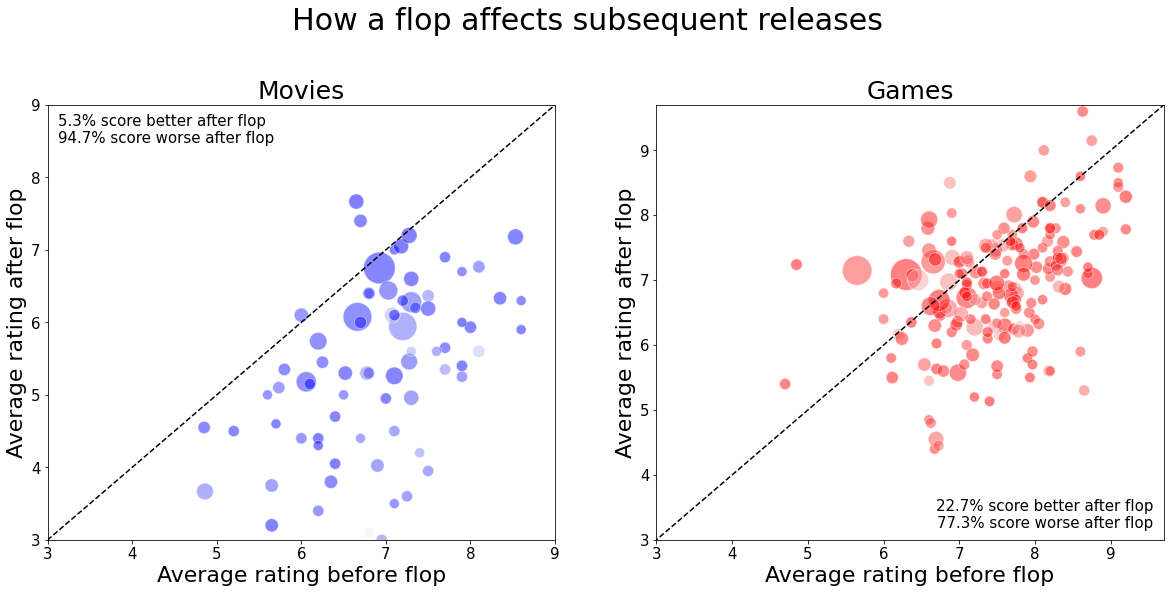

In [217]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots

# plot movie data as blue scatter plot
sns.scatterplot(ax=axs[0], x=movie_flops['avg_rating_pre_drop'], y=movie_flops['avg_rating_post_drop'], size=movie_flops['releases_in_franchise'], color='blue', alpha=0.5, hue=movie_flops['biggest_drop'], palette=sns.light_palette("blue", as_cmap=True), sizes=(100, 1000))
sns.scatterplot(ax=axs[1], x=game_flops['avg_rating_pre_drop'], y=game_flops['avg_rating_post_drop'], size=game_flops['releases_in_franchise'], color='blue', alpha=0.5, hue=game_flops['biggest_drop'], palette=sns.light_palette("red", as_cmap=True), sizes=(100, 1000))

"""
for i, row in movie_flops.iterrows():
    # Prevents error messages for ones that don't appear on the graph
    if (row['pos_biggest_drop'] < 100) & (row['pos_biggest_drop'] > 0):
        if (row['biggest_drop']) < franchise_df_movie.biggest_drop.quantile(0.01):
            axs[0].text(row['avg_rating_pre_drop'], row['avg_rating_post_drop'], row['franchise_name'], fontsize=14)
for i, row in game_flops.iterrows():
    if (row['pos_biggest_drop'] < 100) & (row['pos_biggest_drop'] > 0):
          if (row['biggest_drop']) < franchise_df_game.biggest_drop.quantile(0.01):
                axs[1].text(row['avg_rating_pre_drop'], row['avg_rating_post_drop'], row['franchise_name'], fontsize=14)
"""

# set the same diagonal line from the origin for both subplots
max_val = max(df['avg_rating_pre_drop'].max(), df['avg_rating_post_drop'].max())
axs[0].plot([0, max_val], [0, max_val], 'k--')
axs[1].plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels for both subplots
fig.suptitle('How a flop affects subsequent releases', fontsize = plot_title_size, y=1.05)
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].set_xlabel('Average rating before flop', fontsize = axis_label_size)
axs[0].set_ylabel('Average rating after flop', fontsize = axis_label_size)
axs[1].set_title('Games', fontsize = subplot_title_size)
axs[1].set_xlabel('Average rating before flop', fontsize = axis_label_size)
axs[1].set_ylabel('Average rating after flop', fontsize = axis_label_size)
axs[0].tick_params(labelsize=tick_label_size)
axs[1].tick_params(labelsize=tick_label_size)

axs[0].set_xlim([3, 9])
axs[0].set_ylim([3, 9])
axs[1].set_xlim([3, max_val])
axs[1].set_ylim([3, max_val])

# calculate the percentage of points above and below the line for each subplot
movie_above_line = 100 * len(movie_flops[movie_flops['avg_rating_post_drop'] > movie_flops['avg_rating_pre_drop']]) / len(movie_flops.dropna())
game_above_line = 100 * len(game_flops[game_flops['avg_rating_post_drop'] > game_flops['avg_rating_pre_drop']]) / len(game_flops.dropna())
movie_below_line = 100 - movie_above_line
game_below_line = 100 - game_above_line

# add the percentage of points above and below the line to each subplot
axs[0].text(0.02, 0.98, f'{movie_above_line:.1f}% score better after flop\n{movie_below_line:.1f}% score worse after flop', transform=axs[0].transAxes, va='top', ha='left', fontsize=15)
axs[1].text(0.98, 0.02, f'{game_above_line:.1f}% score better after flop\n{game_below_line:.1f}% score worse after flop', transform=axs[1].transAxes, va='bottom', ha='right', fontsize=15)


# Modify the legend
axs[0].legend().remove()
axs[1].legend().remove()

# show the plot
plt.show()
fig.savefig("flop_subsequent.png", bbox_inches='tight', facecolor='w')

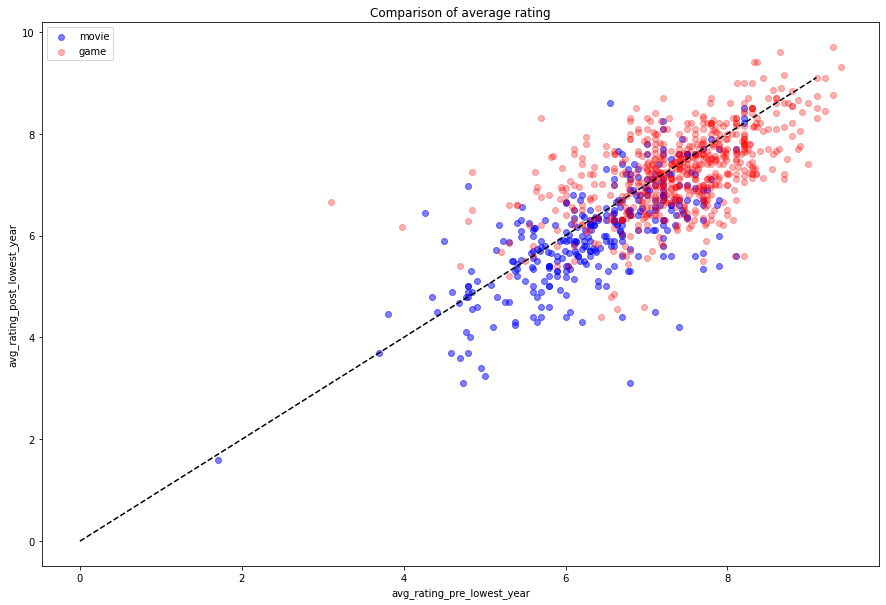

In [170]:
fig, ax = plt.subplots(figsize=(15, 10))

# plot movie data as blue scatter plot
plt.scatter(franchise_df_movie['avg_rating_pre_lowest_year'], franchise_df_movie['avg_rating_post_lowest_year'], c='blue', label='movie', alpha = 0.5)
plt.scatter(franchise_df_game['avg_rating_pre_lowest_year'], franchise_df_game['avg_rating_post_lowest_year'], c='red', label='game', alpha = 0.3)

# draw a diagonal line from the origin
max_val = max(franchise_df_movie['avg_rating_pre_lowest_year'].max(), franchise_df_movie['avg_rating_post_lowest_year'].max())
plt.plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels
plt.title('Comparison of average rating')
plt.xlabel('avg_rating_pre_lowest_year',)
plt.ylabel('avg_rating_post_lowest_year')

# set legend
plt.legend()

# show the plot
plt.show()


This checks average rating relative to rolling mean

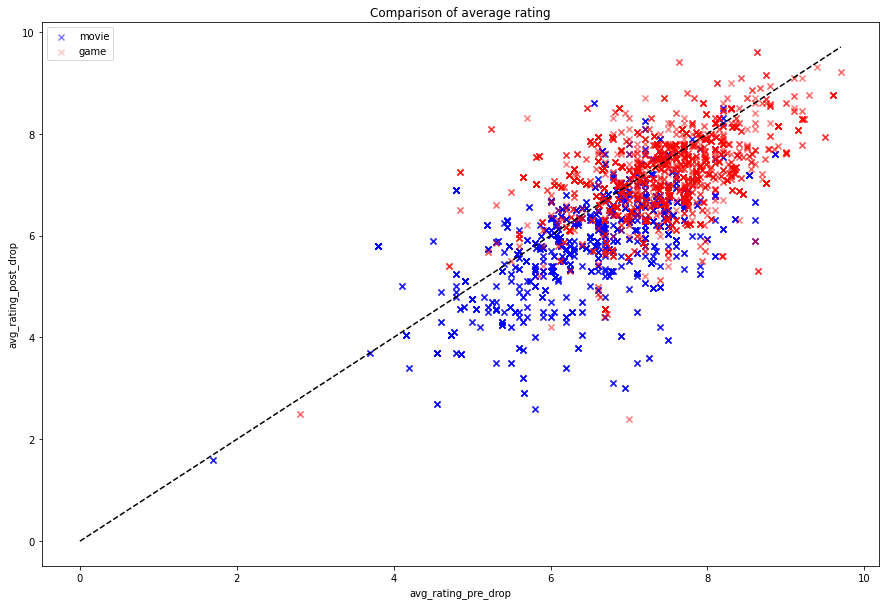

In [146]:
fig, ax = plt.subplots(figsize=(15, 10))

# create separate dataframes for movie and game content types
df_movie = df[df['type'] == 'movie']
df_game = df[df['type'] == 'game']

# plot movie data as blue scatter plot
plt.scatter(df_movie['avg_rating_pre_drop'], df_movie['avg_rating_post_drop'], marker = 'x', c='blue', label='movie', alpha = 0.5)

# plot game data as red scatter plot
plt.scatter(df_game['avg_rating_pre_drop'], df_game['avg_rating_post_drop'],marker = 'x', c='red', label='game', alpha = 0.2)

# draw a diagonal line from the origin
max_val = max(df['avg_rating_pre_drop'].max(), df['avg_rating_post_drop'].max())
plt.plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels
plt.title('Comparison of average rating')
plt.xlabel('avg_rating_pre_drop',)
plt.ylabel('avg_rating_post_drop')

# set legend
plt.legend()

# show the plot
plt.show()


In [52]:
franchise_grouped_df['diff_pre_vs_post'] = franchise_grouped_df.apply(lambda x: x['avg_post_rating'] - x['avg_pre_rating'], axis = 1)
franchise_grouped_df['diff_pre_vs_post_rolling_mean'] = franchise_grouped_df.apply(lambda x: x['avg_post_rating_rolling_mean'] - x['avg_pre_rating_rolling_mean'], axis = 1)

In [51]:
franchise_grouped_df['diff_between_pre_and_lowest'] = franchise_grouped_df['diff_between_pre_and_lowest'].apply(lambda x: 0 if pd.isna(x) else abs(x))

In [76]:
franchise_grouped_df['diff_lowest_vs_avg'] = franchise_grouped_df['average_rating'] - franchise_grouped_df['lowest_rating']

In [78]:
franchise_grouped_df

,franchise_name,total_running_length_years,releases_in_franchise,content_type,avg_pre_rating,average_rating,lowest_rating,avg_post_rating,average_votes,lowest_rated_year,pos_in_fran_lowest_rated,diff_between_post_and_lowest,diff_between_pre_and_lowest,diff_from_rolling_mean,lowest_rated_year_rolling_mean,lowest_rated_pos_rolling_mean,avg_pre_rating_rolling_mean,avg_post_rating_rolling_mean,diff_pre_vs_post,diff_pre_vs_post_rolling_mean,diff_lowest_vs_avg
franchise_id,,,,,,,,,,,,,,,,,,,,,
3025-1,Mario,45.0,195.0,game,NaN,6.800734,3.000000,6.891227,750.130888,1978.0,0.000000,3.891227,NaN,-0.131610,1994.0,36.363636,6.407483,7.081909,NaN,0.674426,3.800734
3025-10,Tony Hawk,22.0,15.0,game,6.866667,6.671429,2.500000,8.500000,601.107143,2015.0,76.190476,6.000000,-4.366667,-0.335897,2015.0,76.190476,6.866667,8.500000,1.633333,1.633333,4.171429
3025-100,Commander Keen,12.0,8.0,game,NaN,7.080556,6.866667,7.187500,69.805556,1990.0,0.000000,0.320833,NaN,-0.040278,2001.0,100.000000,7.120833,NaN,NaN,NaN,0.213889
3025-1000,Fate,22.0,10.0,game,7.700000,7.590000,7.100000,7.637500,51.800000,2005.0,23.809524,0.537500,-0.600000,-0.300000,2005.0,23.809524,7.700000,7.637500,-0.062500,-0.062500,0.490000
3025-1008,Winx Club,9.0,6.0,game,7.550000,7.590000,7.100000,8.200000,11.500000,2012.0,75.000000,1.100000,-0.450000,-0.112500,2012.0,75.000000,7.550000,8.200000,0.650000,0.650000,0.490000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f99,The Conjuring Universe,9.0,8.0,movie,6.675000,6.264286,5.300000,5.925000,205675.000000,2018.0,62.500000,0.625000,-1.375000,-1.050000,2014.0,12.500000,7.500000,6.190000,-0.750000,-1.310000,0.964286
f990,Inspector Hornleigh,3.0,3.0,movie,6.750000,6.725000,6.700000,NaN,258.000000,1941.0,100.000000,NaN,-0.050000,-0.025000,1941.0,100.000000,6.750000,NaN,NaN,NaN,0.025000
f993,I soliti ignoti,28.0,3.0,movie,7.450000,6.766667,5.400000,NaN,4053.333333,1985.0,100.000000,NaN,-2.050000,-0.683333,1985.0,100.000000,7.450000,NaN,NaN,NaN,1.366667


In [79]:
# create separate dataframes for movie and game content types
franchise_grouped_df_movie = franchise_grouped_df[franchise_grouped_df['content_type'] == 'movie']
franchise_grouped_df_game = franchise_grouped_df[franchise_grouped_df['content_type'] == 'game']

In [81]:
game_percentile_90 = franchise_grouped_df_game.diff_lowest_vs_avg.quantile(0.9)
movie_percentile_90 = franchise_grouped_df_movie.diff_lowest_vs_avg.quantile(0.9) 

In [103]:
franchise_grouped_df_game.diff_pre_vs_post_rolling_mean.quantile(0.9)

0.6160000000000001

In [107]:
game_percentile_10 = franchise_grouped_df_game.diff_from_rolling_mean.quantile(0.2)
movie_percentile_10 = franchise_grouped_df_movie.diff_from_rolling_mean.quantile(0.2) 

In [108]:
df = franchise_grouped_df_movie[franchise_grouped_df_movie['diff_from_rolling_mean'] < movie_percentile_10]
franchise_grouped_df_game_flops = franchise_grouped_df_game[franchise_grouped_df_game['diff_from_rolling_mean'] < game_percentile_10]

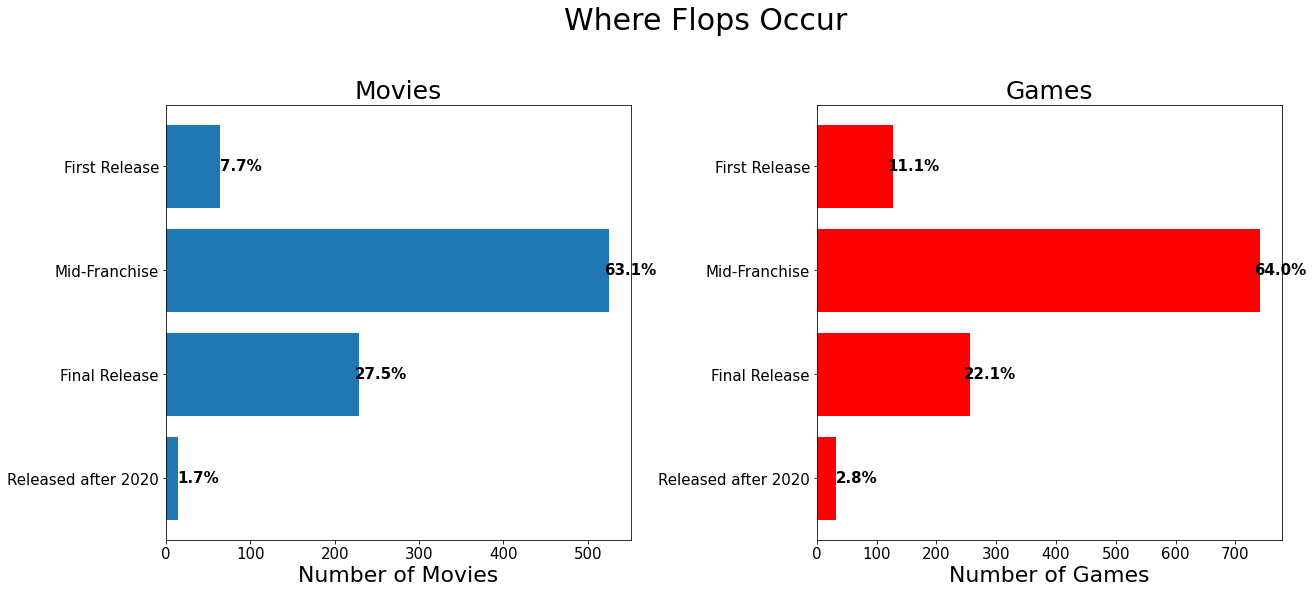

In [68]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots
fig.subplots_adjust(wspace=0.4, hspace=0.6)

# define the x-axis labels
x_labels = ['Released after 2020', 'Final Release', 'Mid-Franchise', 'First Release']

# create a list of the y-axis values
movie_values = [len(df[(df['lowest_rated_pos_rolling_mean'] == 100) & (df['lowest_rated_year_rolling_mean'] >= 2020)]),
            len(df[(df['lowest_rated_pos_rolling_mean'] == 100) & (df['lowest_rated_year_rolling_mean'] < 2020)]),
            len(df[~(df['lowest_rated_pos_rolling_mean'] == 0) & ~(df['lowest_rated_pos_rolling_mean'] == 100)]),
            len(df[df['lowest_rated_pos_rolling_mean'] == 0])]
            
game_values = [len(franchise_grouped_df_game_flops[(franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 100) & (franchise_grouped_df_game_flops['lowest_rated_year_rolling_mean'] >= 2020)]),
            len(franchise_grouped_df_game_flops[(franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 100) & (franchise_grouped_df_game_flops['lowest_rated_year_rolling_mean'] < 2020)]),
            len(franchise_grouped_df_game_flops[~(franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 0) & ~(franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 100)]),
            len(franchise_grouped_df_game_flops[franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 0])]
            
# plot the bar chart
axs[0].barh(x_labels, movie_values)
axs[1].barh(x_labels, game_values, color = 'red')

# set the title and y-axis label
fig.suptitle('Where  Occur', fontsize = plot_title_size, y = 1.05)
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].set_xlabel('Number of Movies', fontsize = axis_label_size)
axs[1].set_title('Games', fontsize = subplot_title_size)
axs[1].set_xlabel('Number of Games', fontsize = axis_label_size)
axs[0].tick_params(labelsize=tick_label_size)
axs[1].tick_params(labelsize=tick_label_size)

movie_percentages = [(x / sum(movie_values)) * 100 for x in movie_values]
game_percentages = [(x / sum(game_values)) * 100 for x in game_values]

for i, v in enumerate(movie_percentages):
    if v > 10:
        axs[0].text(movie_values[i]-5, i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize=15, ha='left', va='center')
    else:
        axs[0].text(movie_values[i], i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize=15, ha='left', va='center')

for i, v in enumerate(game_percentages):
    if v > 10:
        axs[1].text(game_values[i]-10, i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize = 15, ha='left', va='center')
    else:
        axs[1].text(game_values[i], i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize = 15, ha='left', va='center')  



# display the plot
plt.show()


This was out original idea with average vs lowest

In [84]:
df = franchise_grouped_df_movie[franchise_grouped_df_movie['diff_lowest_vs_avg'] > movie_percentile_90]
franchise_grouped_df_game_flops = franchise_grouped_df_game[franchise_grouped_df_game['diff_lowest_vs_avg'] > game_percentile_90]

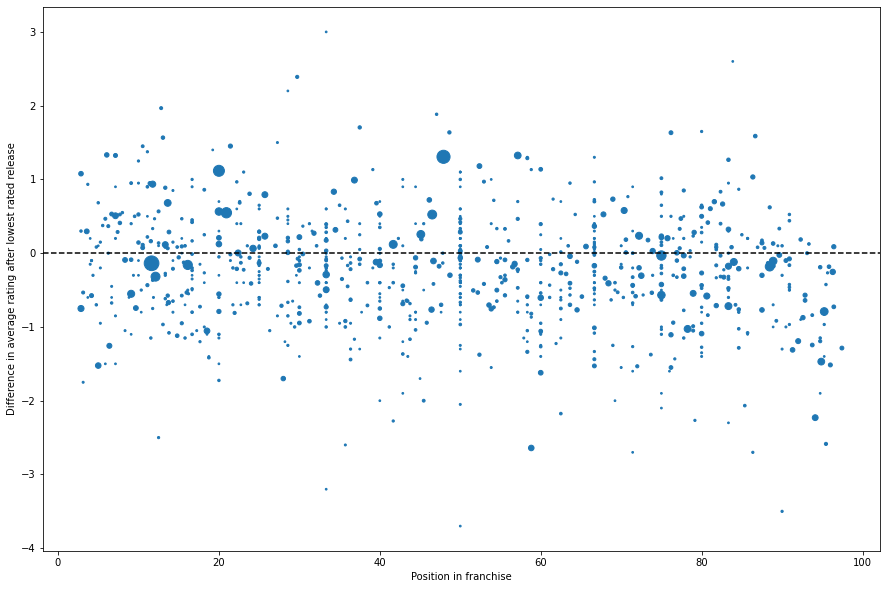

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(y=franchise_grouped_df['diff_pre_vs_post'], x=franchise_grouped_df['lowest_rated_pos'], s = franchise_grouped_df['releases_in_franchise'])
plt.axhline(y=0, linestyle='--', color='black')
plt.ylabel('Difference in average rating after lowest rated release')
plt.xlabel('Position in franchise')
#plt.xscale('log')
plt.show()


In [34]:
franchise_grouped_df[franchise_grouped_df['content_type']=='game'].diff_lowest_vs_avg.describe()

count    1157.000000
mean        1.094568
std         0.832433
min         0.000000
25%         0.500000
50%         0.882576
75%         1.466667
max         6.306140
Name: diff_lowest_vs_avg, dtype: float64

In [35]:
franchise_grouped_df_movie[franchise_grouped_df_movie['avg_pre_rating'] == franchise_grouped_df_movie['avg_post_rating']]

,franchise_name,total_running_length_years,releases_in_franchise,content_type,avg_pre_rating,average_rating,lowest_rating,avg_post_rating,average_votes,lowest_rated_year,pos_in_fran_lowest_rated,diff_between_post_and_lowest,diff_between_pre_and_lowest,diff_pre_vs_post,diff_lowest_vs_avg
franchise_id,,,,,,,,,,,,,,,
f1050,Lucky Stars (Secondary Trilogy),7.0,3.0,movie,5.4,5.366667,5.30,5.4,227.666667,1989.0,50.000000,0.10,0.10,0.0,0.066667
f1092,My Wife Is a Gangster,6.0,3.0,movie,6.3,6.200000,6.00,6.3,2138.666667,2003.0,40.000000,0.30,0.30,0.0,0.200000
f1108,Noriko,5.0,3.0,movie,8.2,8.166667,8.10,8.2,30134.000000,1951.0,50.000000,0.10,0.10,0.0,0.066667
f1272,"Wally ""The Fox"" Benton",3.0,3.0,movie,6.7,6.633333,6.50,6.7,794.000000,1942.0,50.000000,0.20,0.20,0.0,0.133333
f776,BRD Trilogy,4.0,4.0,movie,7.7,7.450000,6.95,7.7,8320.666667,1981.0,66.666667,0.75,0.75,0.0,0.500000
f960,The Happy Hooker,6.0,3.0,movie,3.7,3.600000,3.40,3.7,857.666667,1977.0,40.000000,0.30,0.30,0.0,0.200000


In [36]:
franchise_grouped_df_game_flops[(franchise_grouped_df_game_flops['lowest_rated_pos'] == 100) & (franchise_grouped_df_game_flops['lowest_rated_year'] > 2019)]

,franchise_name,total_running_length_years,releases_in_franchise,content_type,avg_pre_rating,average_rating,lowest_rating,avg_post_rating,average_votes,lowest_rated_year,pos_in_fran_lowest_rated,diff_between_post_and_lowest,diff_between_pre_and_lowest,diff_pre_vs_post,diff_lowest_vs_avg
franchise_id,,,,,,,,,,,,,,,
3025-148,Diablo,27.0,8.0,game,8.285714,7.612500,2.9,NaN,1929.375,2022.0,100.0,NaN,5.385714,NaN,4.712500
3025-51,Battlefield,20.0,18.0,game,7.476923,7.171429,3.2,NaN,2729.750,2021.0,100.0,NaN,4.276923,NaN,3.971429
3025-848,The Fast and The Furious,15.0,5.0,game,6.450000,5.412500,2.3,NaN,167.250,2020.0,100.0,NaN,4.150000,NaN,3.112500


In [37]:
len(franchise_grouped_df_movie[franchise_grouped_df_movie['avg_pre_rating'] < franchise_grouped_df_movie['avg_post_rating']]) / len(franchise_grouped_df_movie.dropna())

0.2839506172839506

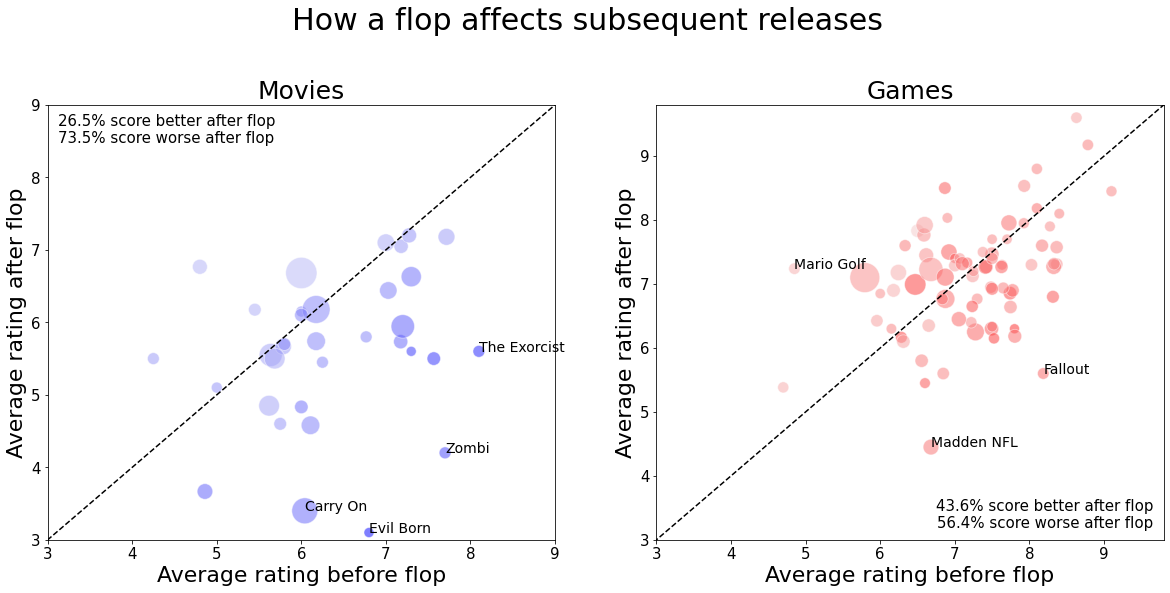

In [129]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots

# plot movie data as blue scatter plot
sns.scatterplot(ax=axs[0], x=df['avg_pre_rating'], y=df['avg_post_rating'], size=df['releases_in_franchise'], color='blue', alpha=0.5, hue=df['diff_between_pre_and_lowest'], palette=sns.light_palette("blue", as_cmap=True), sizes=(100, 1000))
game_scatter = sns.scatterplot(ax=axs[1], x=franchise_grouped_df_game_flops['avg_pre_rating'], y=franchise_grouped_df_game_flops['avg_post_rating'], size=franchise_grouped_df_game_flops['releases_in_franchise'], color='blue', alpha=0.5, hue=franchise_grouped_df_game_flops['diff_between_pre_and_lowest'], palette=sns.light_palette("red", as_cmap=True), sizes=(100, 1000))

for i, row in df.iterrows():
    # Prevents error messages for ones that don't appear on the graph
    if (row['lowest_rated_pos'] < 100) & (row['lowest_rated_pos'] > 0):
        if abs(row['diff_pre_vs_post']) > 2.2:
            axs[0].text(row['avg_pre_rating'], row['avg_post_rating'], row['franchise_name'], fontsize=14)
for i, row in franchise_grouped_df_game_flops.iterrows():
    if (row['lowest_rated_pos'] < 100) & (row['lowest_rated_pos'] > 0):
          if abs(row['diff_pre_vs_post']) > 2.2:
                axs[1].text(row['avg_pre_rating'], row['avg_post_rating'], row['franchise_name'], fontsize=14)


# set the same diagonal line from the origin for both subplots
max_val = max(df['avg_pre_rating'].max(), df['avg_post_rating'].max())
axs[0].plot([0, max_val], [0, max_val], 'k--')
axs[1].plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels for both subplots
fig.suptitle('How a flop affects subsequent releases', fontsize = plot_title_size, y=1.05)
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].set_xlabel('Average rating before flop', fontsize = axis_label_size)
axs[0].set_ylabel('Average rating after flop', fontsize = axis_label_size)
axs[1].set_title('Games', fontsize = subplot_title_size)
axs[1].set_xlabel('Average rating before flop', fontsize = axis_label_size)
axs[1].set_ylabel('Average rating after flop', fontsize = axis_label_size)
axs[0].tick_params(labelsize=tick_label_size)
axs[1].tick_params(labelsize=tick_label_size)

axs[0].set_xlim([3, 9])
axs[0].set_ylim([3, 9])
axs[1].set_xlim([3, max_val])
axs[1].set_ylim([3, max_val])

# calculate the percentage of points above and below the line for each subplot
movie_above_line = 100 * len(df[df['avg_post_rating'] > df['avg_pre_rating']]) / len(df.dropna())
game_above_line = 100 * len(franchise_grouped_df_game_flops[franchise_grouped_df_game_flops['avg_post_rating'] > franchise_grouped_df_game_flops['avg_pre_rating']]) / len(franchise_grouped_df_game_flops.dropna())
movie_below_line = 100 - movie_above_line
game_below_line = 100 - game_above_line

# add the percentage of points above and below the line to each subplot
axs[0].text(0.02, 0.98, f'{movie_above_line:.1f}% score better after flop\n{movie_below_line:.1f}% score worse after flop', transform=axs[0].transAxes, va='top', ha='left', fontsize=15)
axs[1].text(0.98, 0.02, f'{game_above_line:.1f}% score better after flop\n{game_below_line:.1f}% score worse after flop', transform=axs[1].transAxes, va='bottom', ha='right', fontsize=15)


# Modify the legend
axs[0].legend().remove()
axs[1].legend().remove()

# show the plot
plt.show()


In [64]:
df.count()

franchise_name                  84
total_running_length_years      84
releases_in_franchise           84
content_type                    84
avg_pre_rating                  81
average_rating                  84
lowest_rating                   84
avg_post_rating                 37
average_votes                   84
lowest_rated_year               84
pos_in_fran_lowest_rated        84
diff_between_post_and_lowest    37
diff_between_pre_and_lowest     84
diff_pre_vs_post                34
diff_lowest_vs_avg              84
dtype: int64

In [65]:
franchise_grouped_df_game_flops.count()

franchise_name                  116
total_running_length_years      116
releases_in_franchise           116
content_type                    116
avg_pre_rating                  104
average_rating                  116
lowest_rating                   116
avg_post_rating                  90
average_votes                   116
lowest_rated_year               116
pos_in_fran_lowest_rated        116
diff_between_post_and_lowest     90
diff_between_pre_and_lowest     116
diff_pre_vs_post                 78
diff_lowest_vs_avg              116
dtype: int64

The reason we are doing this is because we don't want to assume that a franchise that just gradually decreased in rating died as a result of their last release being a flop. This is why we are taking into account only those franchises where there was a significant drop below the average

In [ ]:
franchise_grouped_df[(franchise_grouped_df['diff_between_pre_and_lowest']>-0.5)].content_type.value_counts()

In [ ]:
franchise_grouped_df[(franchise_grouped_df['diff_between_pre_and_lowest'] < -2) & (franchise_grouped_df['lowest_rated_pos'] != 100)]

In [ ]:
movies['pos_tens'] = pd.qcut(movies['position_in_franchise'].rank(method='first'), q=10,)
games['pos_tens'] = pd.qcut(games['position_in_franchise'].rank(method='first'), q=10,)
df['pos_tens'] = pd.qcut(df['position_in_franchise'].rank(method='first'), q=10,)

df.groupby('pos_tens')['votes_average'].mean().plot()


In [ ]:
#franchise_grouped_df.groupby((franchise_grouped_df['average_releases_per_year'] // 0.1) * 0.1)['average_rating'].mean().plot()
#df[df["min_rating"] == df["rating_average"]].position_in_franchise.value_counts() // 0.1 * 0.1.sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Lowest rated release")

fig, ax = plt.subplots(figsize=(15, 10))
df[df["min_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel="Position in franchise", ylabel="Number of franchises", color="red", ax=ax, label = "Lowest amount of votes")
df[df["min_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Lowest rated release")
df[df["max_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel="Position in franchise", ylabel="Number of franchises", color="red", ax=ax, label = "Highest amount of votes", linestyle = ':')
df[df["max_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Highest rated release", linestyle = '--')

plt.legend()
plt.show()

- Define a flop
- Normalise rating diff to see what the biggest drop offs are across both media
- Graph results and use it to define a reasonable threshold for a flop
- stacked bar chart for games and movies showing % of flops that "recovered"\
&nbsp; ie if the content that flopped was the last in the series\
&nbsp; (may need to filter out content that was released in the last year or 2)


As discussed on Friday it will be interesting to see how you define a "flop" and explore the recovery or otherwise after a flop. try to keep it simple reasonable. If you decide, for example, that a flop is a movie/game that has x% fewer ratings/votes that the preceding title then that's fine as long as you can defend x. You can also write you analysis code in such a way as to make it easy to change x so that you can do a "sensitivity analysis" by varying x. If you find that the outcome is similar for various ranges of x then that's a good sign.
